we start with a weak model and keep improving <br>
here weak learner is a model which is better than random model. <br>
decision tree is used as a weak learner here <br>
in GD boost dt contains some 3-7 levels 

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# import PyQt5

In [9]:
def GradBoost(model, X_train, y_train, X_test, boosting_rounds, learning_rate: float = 0.1):
    #make a first guess of our training target variable using the mean of y_train
    y_hat_train = np.repeat(np.mean(y_train), len(y_train))

    #Initiate the test prediction with the mean of the training target variable.
    y_hat_test = np.repeat(np.mean(y_train), len(y_test))

    #Calculate the residuals
    residuals = y_train - y_hat_train

    #Iterate through the boosting rounds
    for i in range(boosting_rounds):
        #Fit the model to the residuals
        model = model.fit(X_train, residuals)

        #Increment the predicted training y with the pseudoresidulas * learning rate
        y_hat_train = y_hat_train + learning_rate * model.predict(X_train)

        #Increment the predicted test y as well
        y_hat_test = y_hat_test + learning_rate * model.predict(X_test)

        #Calculate the residuals for the next round
        residuals = y_train - y_hat_train

    return y_hat_train, y_hat_test

## Demonstrate

In [10]:
from sklearn.datasets import make_regression

X, y = make_regression(n_samples = 1000,
                        n_features = 20,
                        n_informative = 15,
                        n_targets = 1,
                        bias = 0.0,
                        noise = 20,
                        shuffle = True,
                        random_state = 13)

X_train = X[0:800]
y_train = y[0:800]

X_test = X[800:]
y_test = y[800:]

In [11]:
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor(criterion='squared_error', max_depth=3)

In [12]:
mse_train = []
n_rounds = np.arange(5, 101, 5)
for n_round in n_rounds:
    y_hat_train = GradBoost(model,
                            X_train,
                            y_train,
                            X_test,
                            boosting_rounds=n_round,
                            learning_rate=0.1)[0]

    mse_train.append(np.mean((y_train - y_hat_train) **2))
    print("round #: {0}, mse: {1}".format(n_round, mse_train[-1]))

round #: 5, mse: 34533.86849419914
round #: 10, mse: 25528.592361427367
round #: 15, mse: 19136.599769132084
round #: 20, mse: 14648.04450759926
round #: 25, mse: 11459.06364248089
round #: 30, mse: 9128.094374117594
round #: 35, mse: 7310.768003762691
round #: 40, mse: 5978.90406036746
round #: 45, mse: 4945.0105504213625
round #: 50, mse: 4114.202235579171
round #: 55, mse: 3504.6087240775973
round #: 60, mse: 2986.8922224538755
round #: 65, mse: 2592.205507526533
round #: 70, mse: 2231.005500265884
round #: 75, mse: 1942.7838152537688
round #: 80, mse: 1721.5043747746472
round #: 85, mse: 1538.2240733809203
round #: 90, mse: 1386.3457437257232
round #: 95, mse: 1240.7055168322302
round #: 100, mse: 1117.8412308525267


Text(0, 0.5, 'Training Mean squared error')

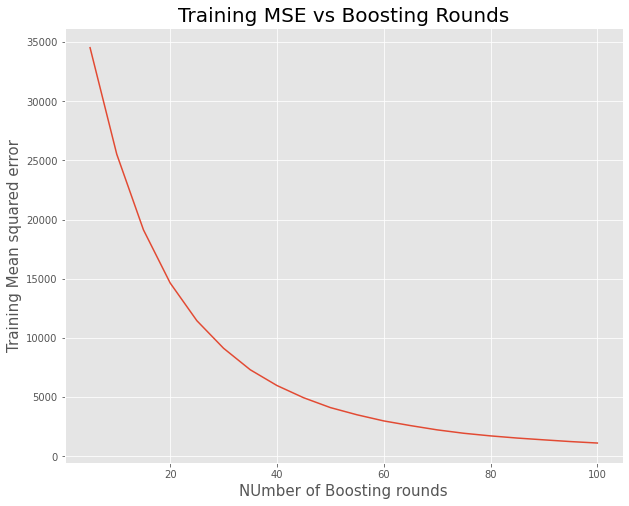

In [13]:
plt.figure(figsize=(10, 8))
plt.plot(n_rounds, mse_train)
plt.title("Training MSE vs Boosting Rounds", fontsize=20)
plt.xlabel('NUmber of Boosting rounds', fontsize=15)
plt.ylabel('Training Mean squared error', fontsize=15)

boosting rounds = 0

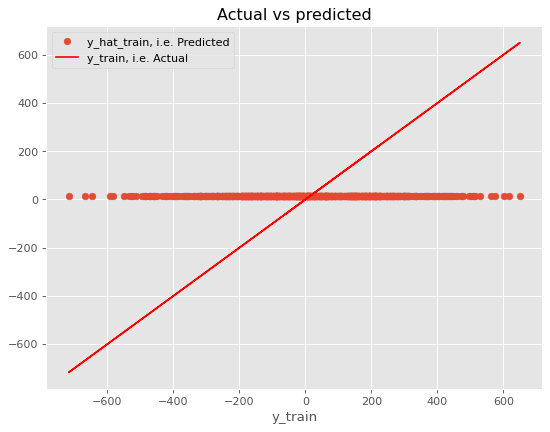

In [14]:
fig = plt.figure(figsize = (8, 6), dpi = 80, facecolor = 'w', edgecolor= 'k')

n_rounds = 0 

y_hat_train, y_hat_test = GradBoost(
    model, X_train, y_train, X_test, 
    boosting_rounds= n_rounds, learning_rate= 0.1
    )

plt.scatter(y_train, y_hat_train, label = 'y_hat_train, i.e. Predicted')
plt.title('Actual vs predicted')
plt.xlabel('y_train')
plt.plot(y_train, y_train, color = 'r', label = 'y_train, i.e. Actual')
plt.legend();

boosting rounds = 10

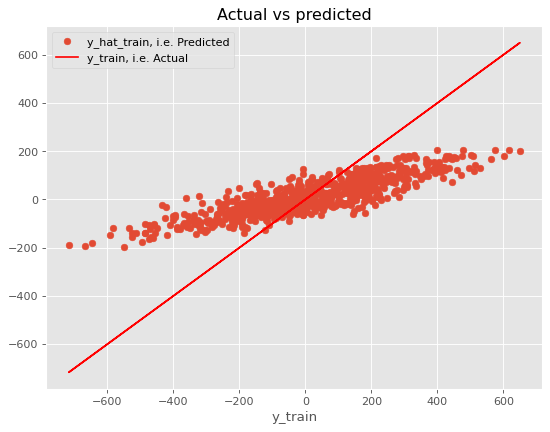

In [15]:
fig = plt.figure(figsize = (8, 6), dpi = 80, facecolor = 'w', edgecolor= 'k')

n_rounds = 10 

y_hat_train, y_hat_test = GradBoost(
    model, X_train, y_train, X_test, 
    boosting_rounds= n_rounds, learning_rate= 0.1
    )

plt.scatter(y_train, y_hat_train, label = 'y_hat_train, i.e. Predicted')
plt.title('Actual vs predicted')
plt.xlabel('y_train')
plt.plot(y_train, y_train, color = 'r', label = 'y_train, i.e. Actual')
plt.legend();

boosting rounds = 100

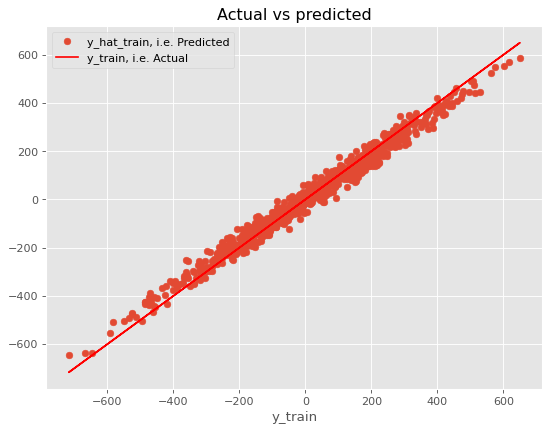

In [16]:
fig = plt.figure(figsize = (8, 6), dpi = 80, facecolor = 'w', edgecolor= 'k')

n_rounds = 100 

y_hat_train, y_hat_test = GradBoost(
    model, X_train, y_train, X_test, 
    boosting_rounds= n_rounds, learning_rate= 0.1
    )

plt.scatter(y_train, y_hat_train, label = 'y_hat_train, i.e. Predicted')
plt.title('Actual vs predicted')
plt.xlabel('y_train')
plt.plot(y_train, y_train, color = 'r', label = 'y_train, i.e. Actual')
plt.legend();

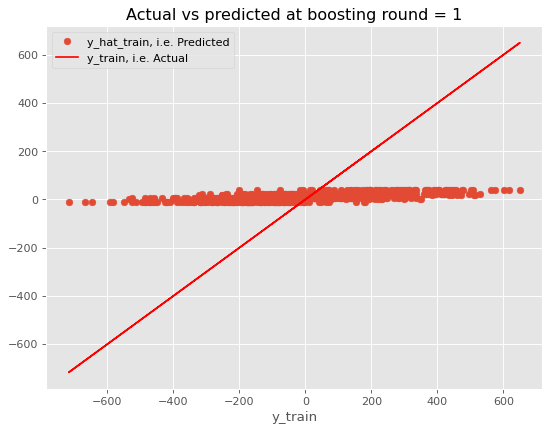

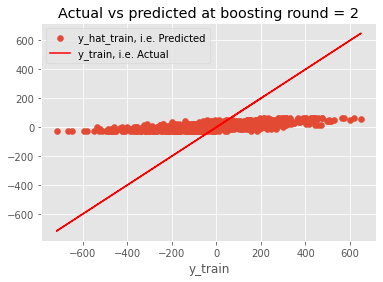

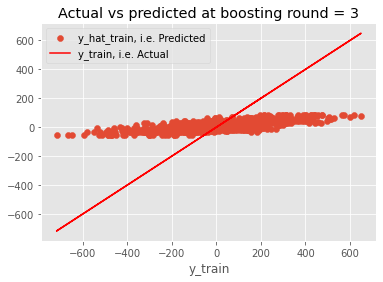

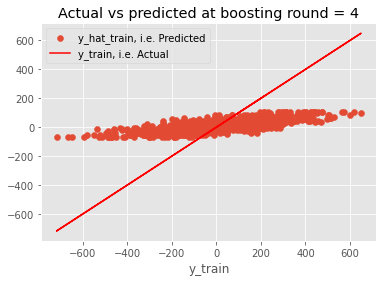

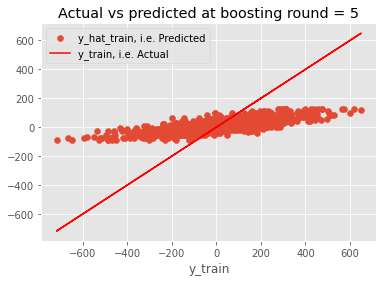

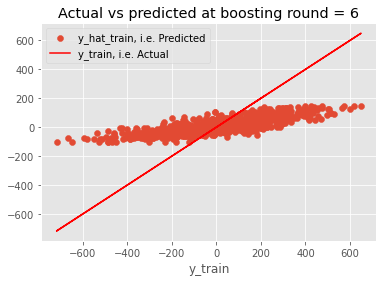

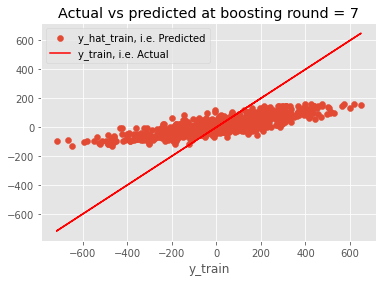

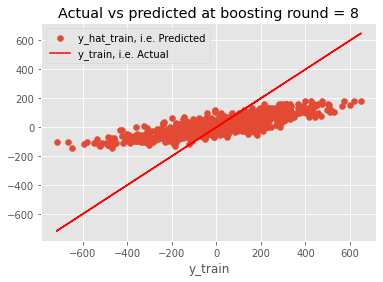

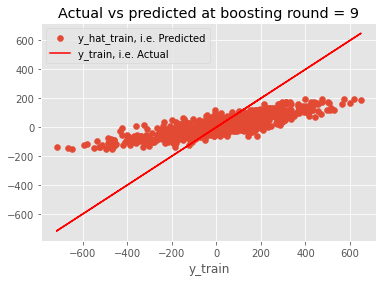

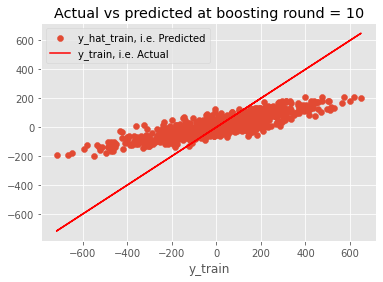

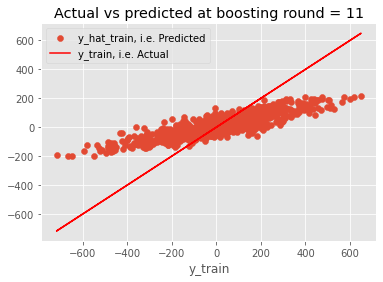

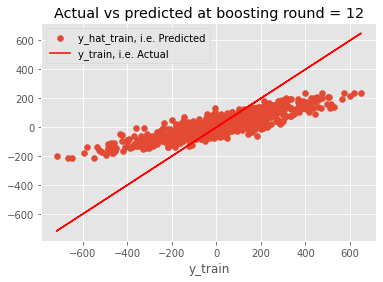

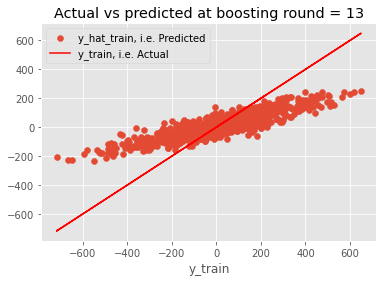

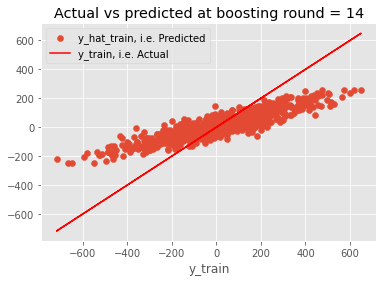

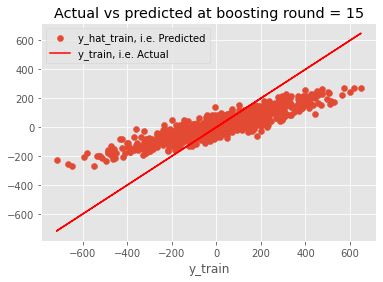

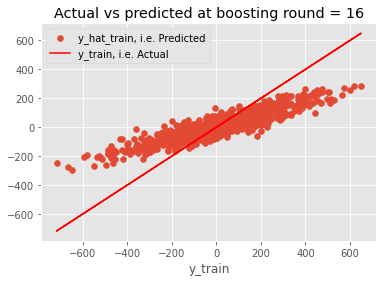

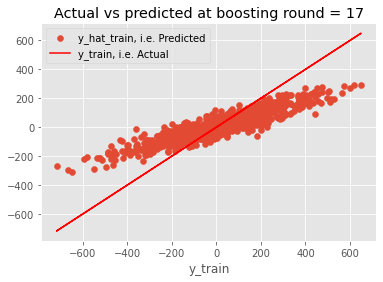

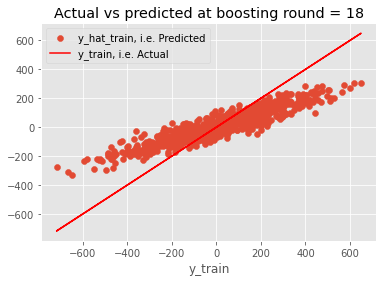

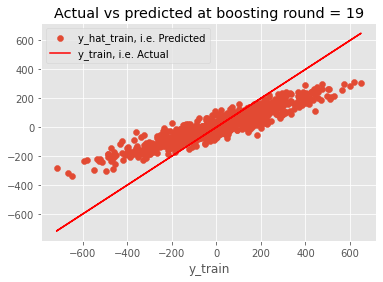

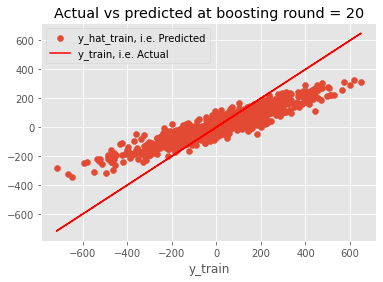

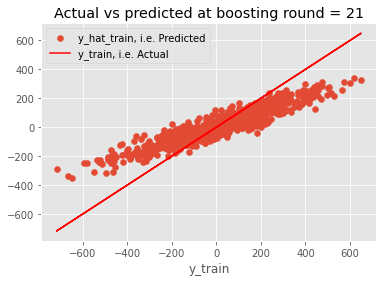

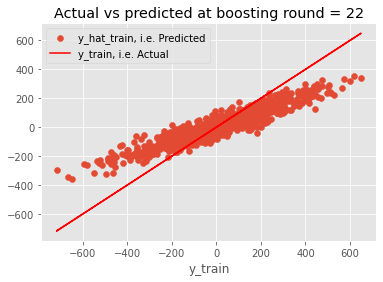

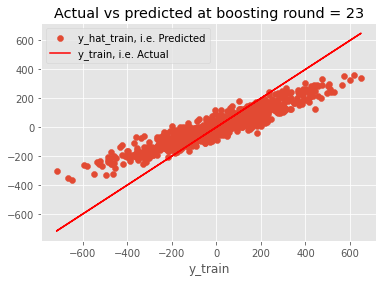

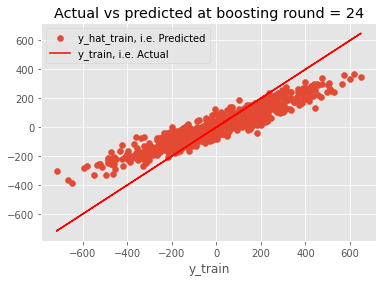

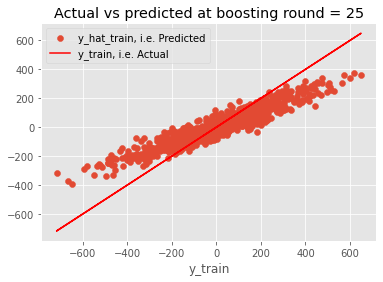

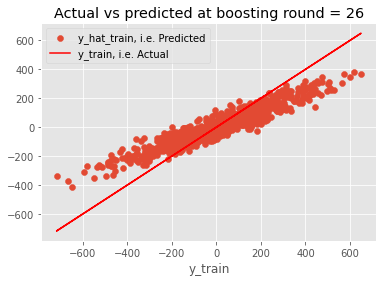

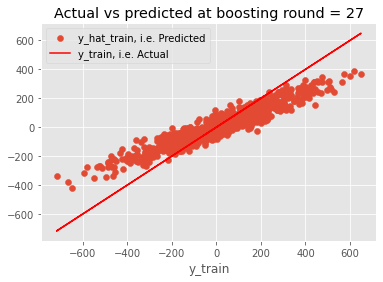

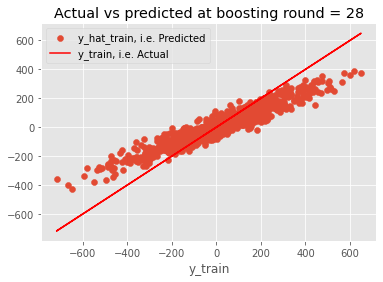

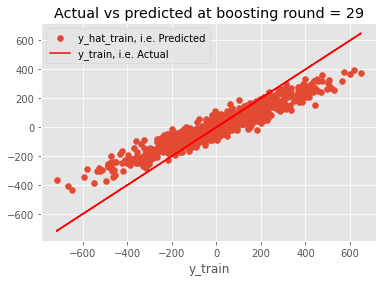

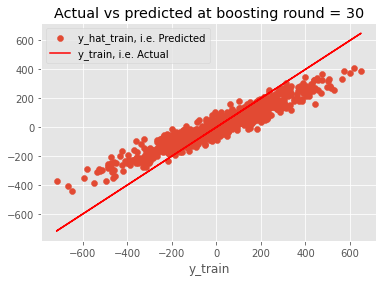

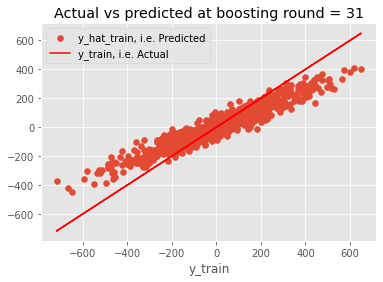

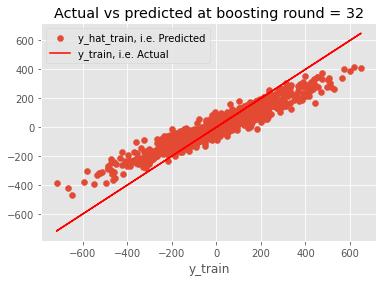

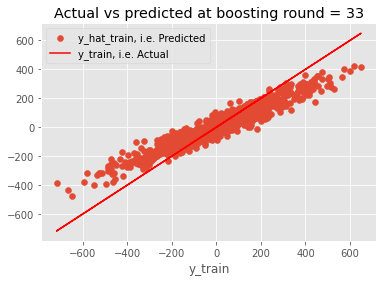

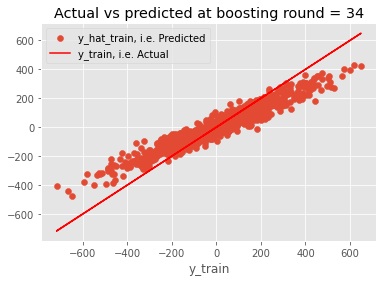

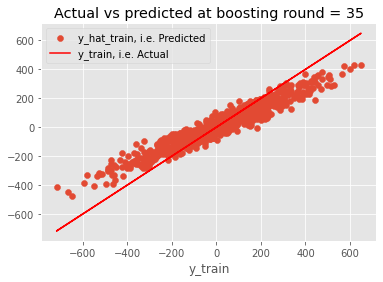

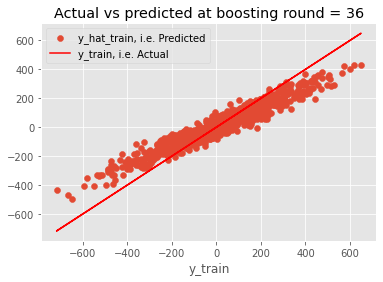

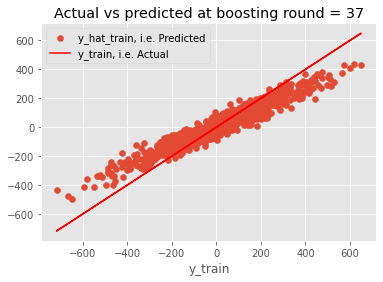

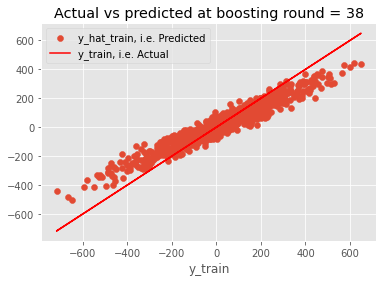

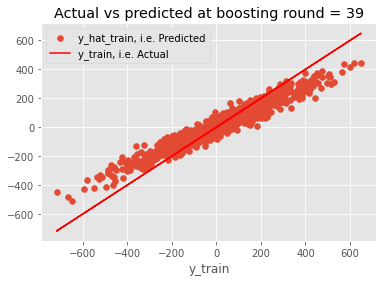

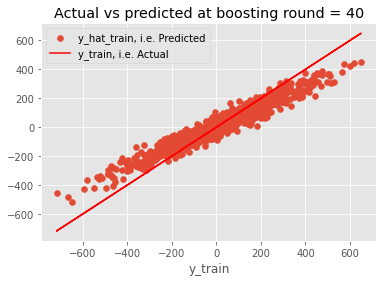

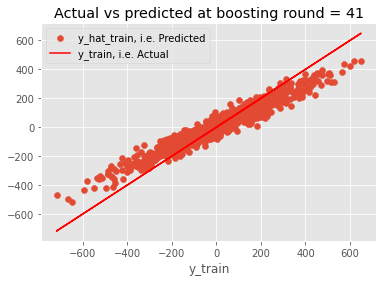

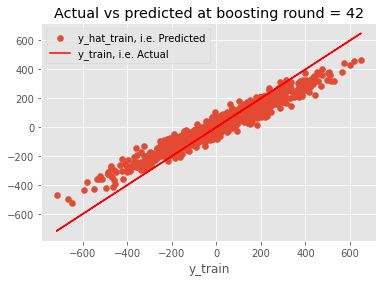

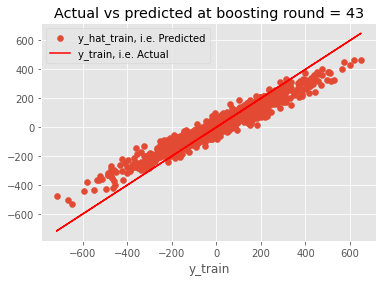

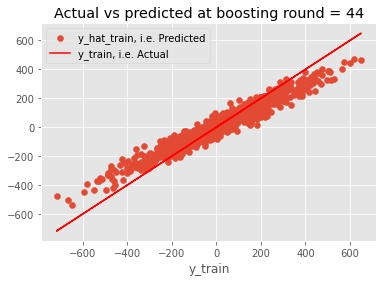

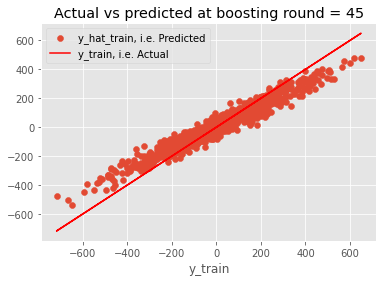

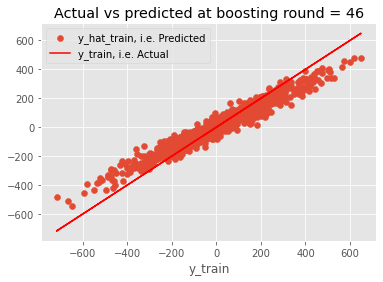

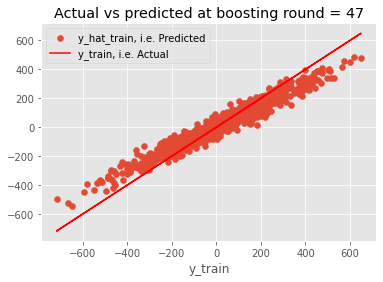

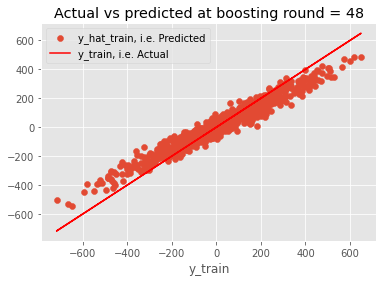

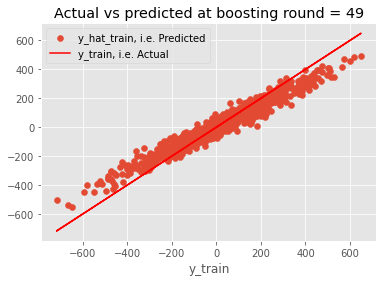

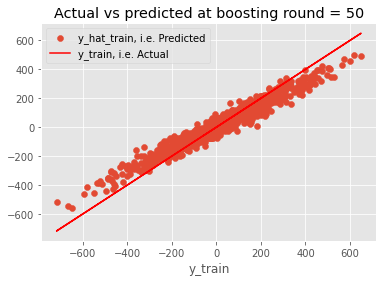

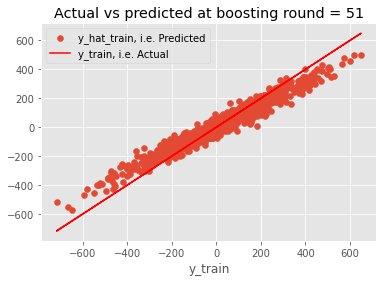

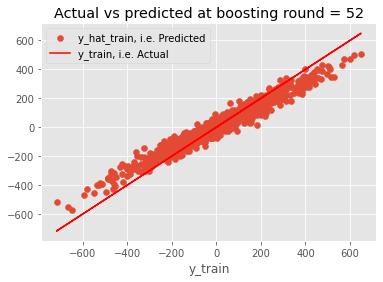

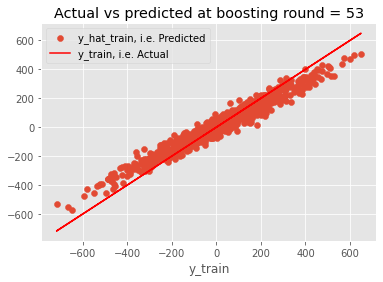

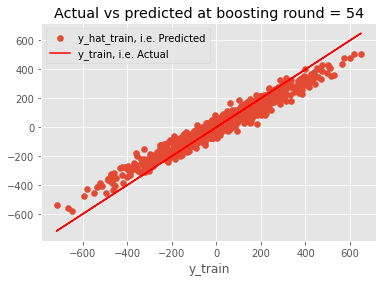

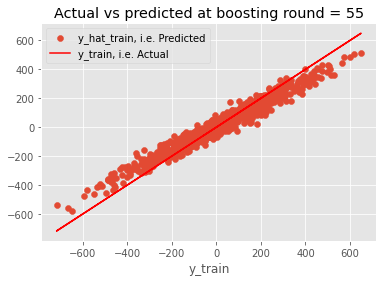

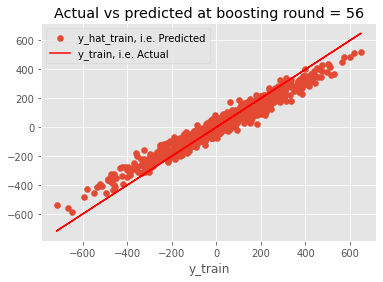

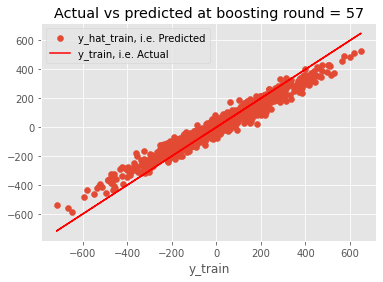

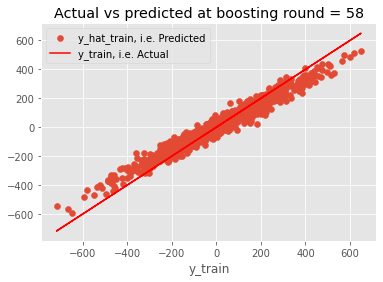

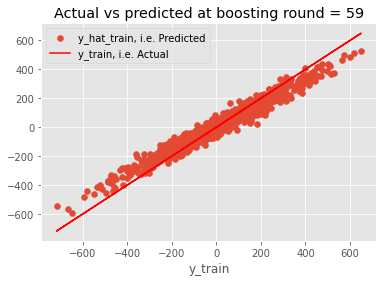

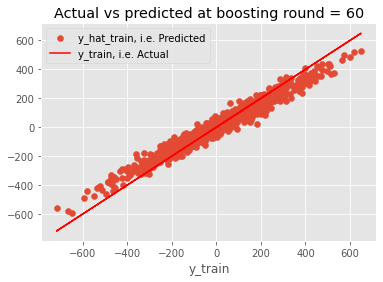

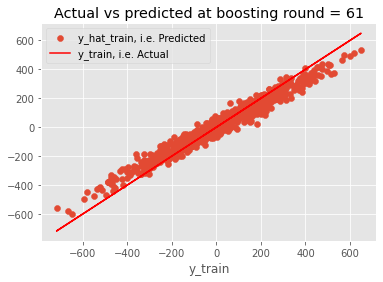

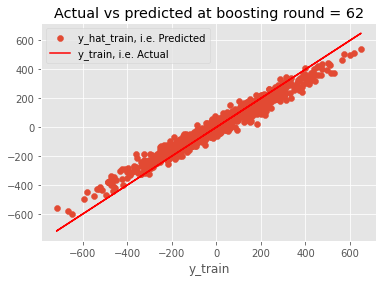

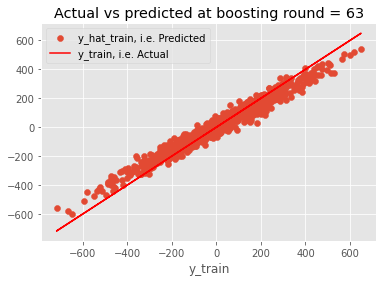

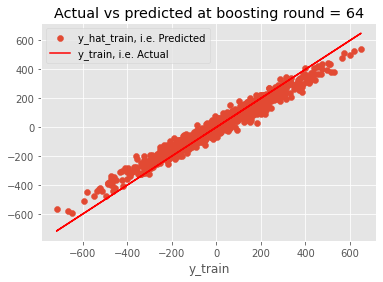

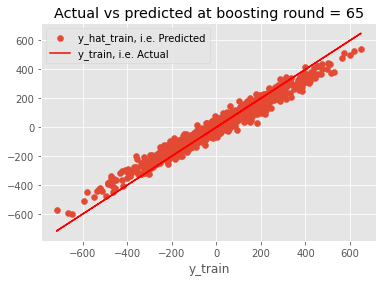

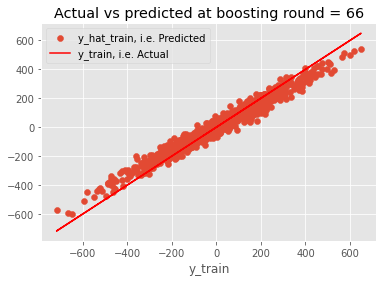

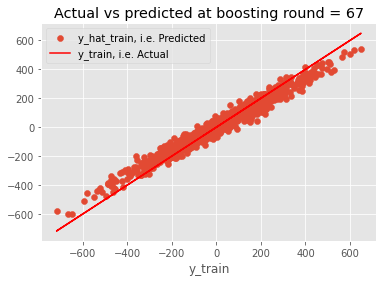

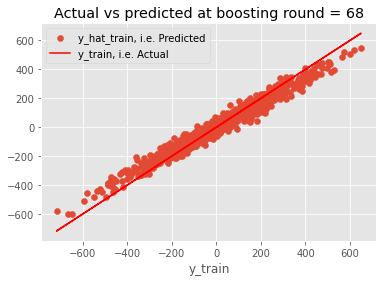

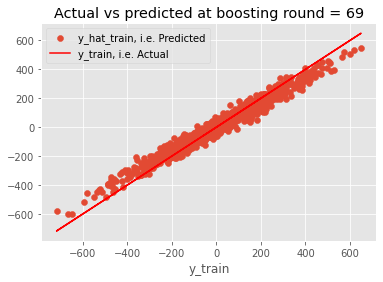

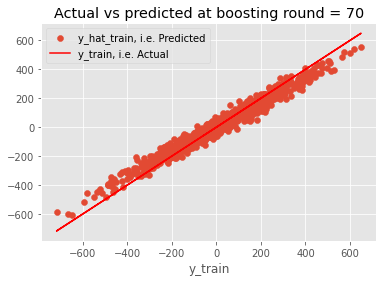

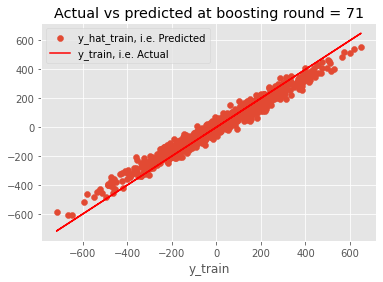

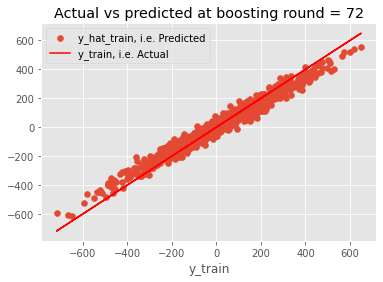

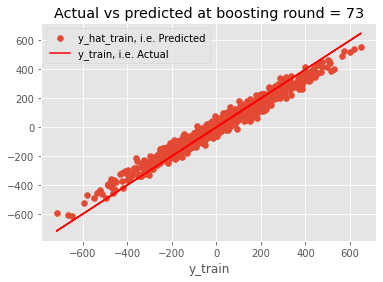

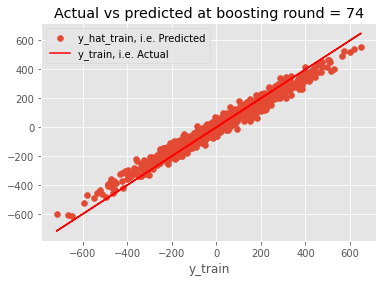

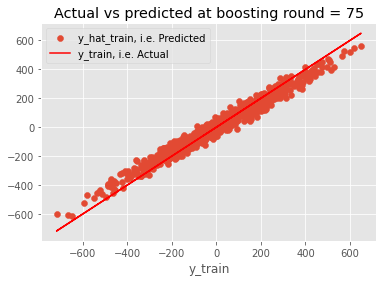

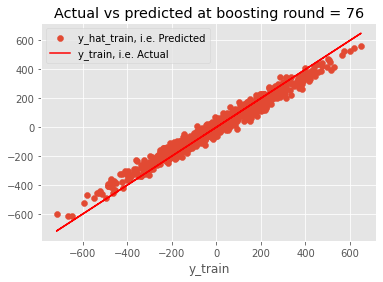

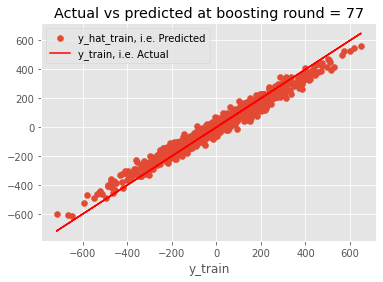

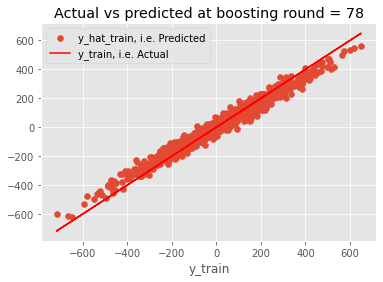

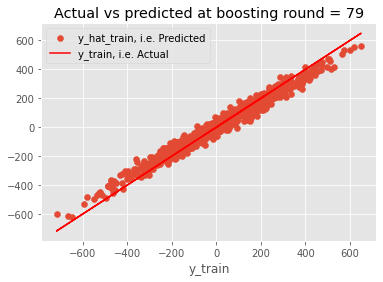

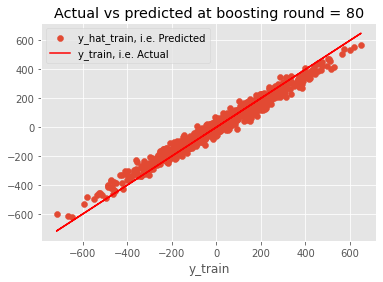

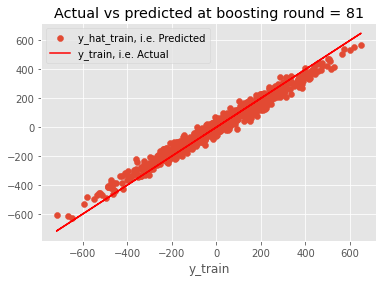

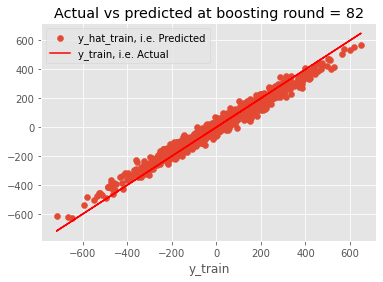

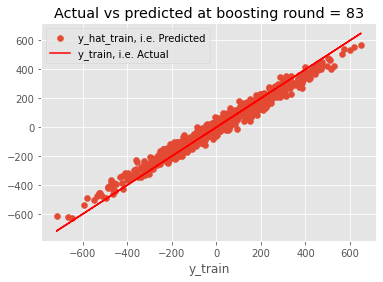

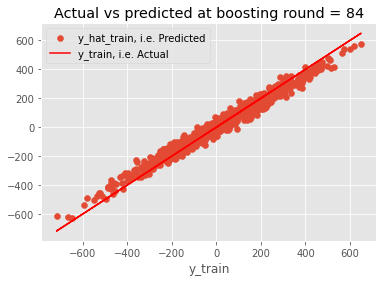

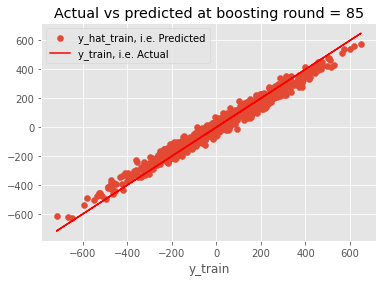

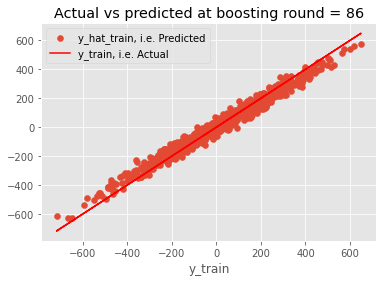

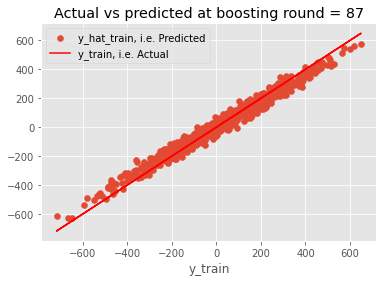

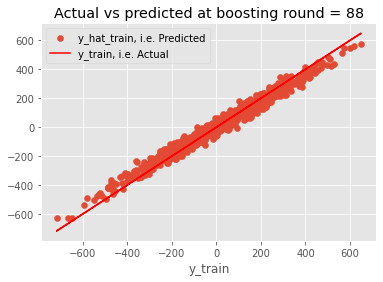

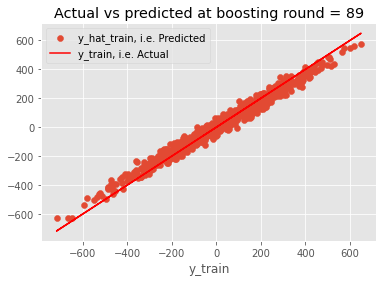

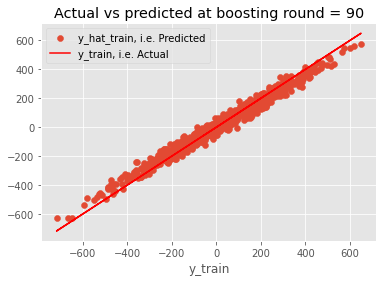

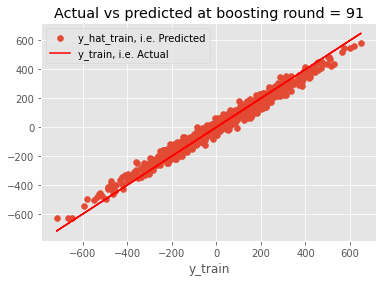

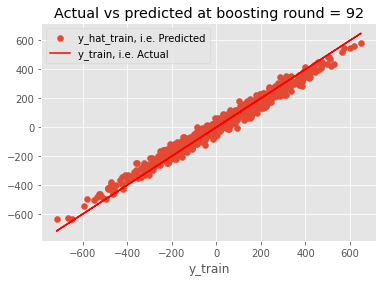

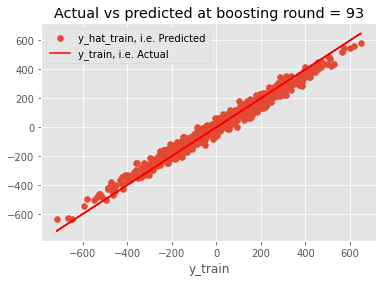

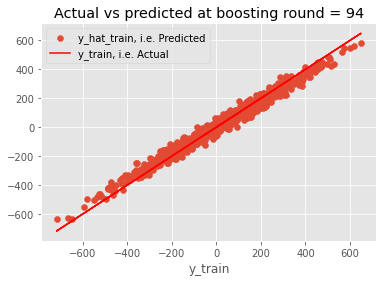

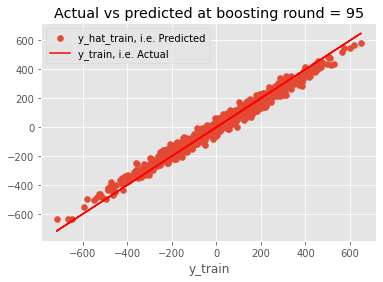

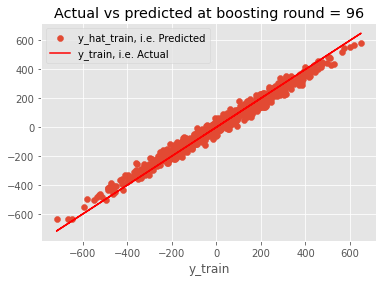

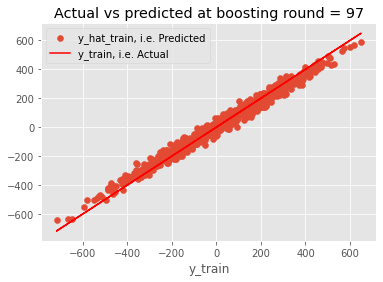

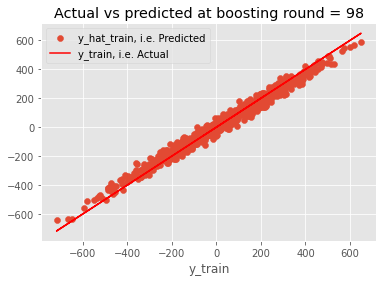

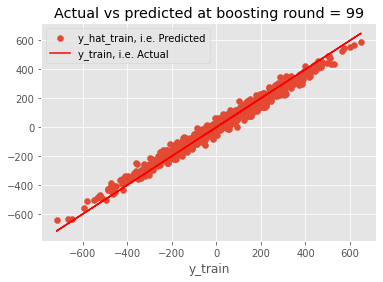

In [17]:
from matplotlib.animation import FuncAnimation

fig = plt.figure(figsize = (8, 6), dpi = 80, facecolor = 'w', edgecolor= 'k')

for i in range(1, 100) : 
    n_rounds = i 

    y_hat_train, y_hat_test = GradBoost(
        model, X_train, y_train, X_test, 
        boosting_rounds= n_rounds, learning_rate= 0.1
        )

    plt.scatter(y_train, y_hat_train, label = 'y_hat_train, i.e. Predicted')
    plt.title('Actual vs predicted at boosting round = '+ str(n_rounds))
    plt.xlabel('y_train')
    plt.plot(y_train, y_train, color = 'r', label = 'y_train, i.e. Actual')
    plt.legend()
    plt.show();